# BigMart Project

## 1-Loading Packages and Data

In [548]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log,sqrt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression ,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#pd.plotting.register_matplotlib_converters() #This line of code ensures that pandas can properly convert dates and times to a format that matplotlib can understand and plot correctly.
%matplotlib inline



# read in all training data
training_data = pd.read_csv("Train.csv")

# read in all test data
testing_data = pd.read_csv("Test.csv")

# set seed for reproducibility
np.random.seed(0) 

## 2-Data Structure and Content

### 2.1 Training Data 

In [549]:
#Getting all info about each column in our training dataset 
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [550]:
# look at the first ten rows of the training data . 
training_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [551]:
# check for duplicated rows
training_data.duplicated().any()

False

### 2.2 Testing Data 

In [552]:
# check for duplicated rows
testing_data.duplicated().any()

False

In [553]:
# look at the first ten rows of the test data
testing_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


## 3-Data Cleaning

### 3.1 Null Values

In [554]:
def TreatNullValues(dataframe,Col1,Col2):
    #get the index of each identifier (without duplicate) where the weight is null
    index_identifier = dataframe[Col1].where(dataframe[Col2].isnull()).drop_duplicates().dropna()
    # get then the corresponding weight to fill the null values with these weights since some identifiers exists more than once through the dataset
    weights_df = dataframe.loc[dataframe[Col1].isin(index_identifier), [Col1,Col2]]
    null_idWeights= []
    # Fill in the null Item_Weight values with the next available weight for the corresponding identifier
    for identifier in index_identifier:
        weights = weights_df.loc[weights_df[Col1] == identifier, Col2]
        if weights.isnull().all(): #in case the identifier's weight is always null
            null_idWeights.append(identifier)
            continue
        next_weight = weights[weights.first_valid_index()]
        dataframe.loc[(dataframe[Col1] == identifier) & (dataframe[Col2].isnull()), Col2] = next_weight
    return dataframe,pd.DataFrame(null_idWeights) 

In [555]:
#Null Values Summary 
training_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [556]:
testing_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [557]:
null_percentage_weight= training_data["Item_Weight"].isnull().sum() * 100 / len(training_data)
print ("Null percentage of Item_Weight column is : " , null_percentage_weight ,"%")

Null percentage of Item_Weight column is :  17.165317376510618 %


In [558]:
null_percentage_weight= training_data["Outlet_Size"].isnull().sum() * 100 / len(training_data)
print ("Null percentage of Outlet_Size column is : " , null_percentage_weight ,"%")

Null percentage of Outlet_Size column is :  28.27642848762173 %


In [559]:
#Showing only the Null rows to choose the best method for elimanting Null Values fro Item_Weight Col
null_item_weight = training_data[training_data['Item_Weight'].isnull()].head(5)
null_item_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


#### Cleaning null values in Item_Weight Column 

In [560]:
training_data,null_idWeights= TreatNullValues(training_data,"Item_Identifier","Item_Weight")
testing_data,null_idWeightsT= TreatNullValues(testing_data,"Item_Identifier","Item_Weight")

In [561]:
training_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [562]:
#In this cell , we will get the type of each identifier 
# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=["Item_Identifier", "Item_Type"])
result_df = training_data.loc[training_data["Item_Weight"].isnull(), ["Item_Identifier", "Item_Type"]]
# For Testing dataset
result_dfT = pd.DataFrame(columns=["Item_Identifier", "Item_Type"])
result_dfT = testing_data.loc[testing_data["Item_Weight"].isnull(), ["Item_Identifier", "Item_Type"]]
# Show the resulting DataFrame
result_df.head()

,Item_Identifier,Item_Type
927,FDN52,Frozen Foods
1922,FDK57,Snack Foods
4187,FDE52,Dairy
5022,FDQ60,Baking Goods


In [563]:

#Now we willl substitute the remaining 4 null values with the mode of the weights of each category
#Group the DataFrame by Item_Type and get the mode of Item_Weight for each group
mode_weights = training_data.groupby("Item_Type")["Item_Weight"].apply(lambda x: x.mode()[0])
mode_weightsT = testing_data.groupby("Item_Type")["Item_Weight"].apply(lambda x: x.mode()[0])

# Replace the null values in Item_Weight with the mode for each corresponding Item_Type
training_data["Item_Weight"] = training_data.apply(lambda row: mode_weights[row["Item_Type"]] if pd.isnull(row["Item_Weight"]) else row["Item_Weight"], axis=1)
testing_data["Item_Weight"] = testing_data.apply(lambda row: mode_weights[row["Item_Type"]] if pd.isnull(row["Item_Weight"]) else row["Item_Weight"], axis=1)

print ("Total null values in Item_Weight columns is : " , training_data["Item_Weight"].isnull().sum())

Total null values in Item_Weight columns is :  0


#### Cleaning null values in Outlet_Size column

In [564]:
#Showing only the Null rows to choose the best method for elimanting Null Values fro Item_Weight Col
null_outlet_size = training_data[training_data['Outlet_Size'].isnull()].head()
null_outlet_size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [565]:
training_data,null_idSize= TreatNullValues(training_data,"Outlet_Identifier","Outlet_Size")
testing_data,null_idSizeT= TreatNullValues(testing_data,"Outlet_Identifier","Outlet_Size")
training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [566]:
#In this cell , we will get the type of each identifier 
# Create a DataFrame to store the results
result2_df = pd.DataFrame(columns=["Outlet_Identifier", "Outlet_Type"])
result2_df = training_data.loc[training_data["Outlet_Size"].isnull(), ["Outlet_Identifier", "Outlet_Type"]]

result2_dfT = pd.DataFrame(columns=["Outlet_Identifier", "Outlet_Type"])
result2_dfT = testing_data.loc[testing_data["Outlet_Size"].isnull(), ["Outlet_Identifier", "Outlet_Type"]]
# Show the resulting DataFrame
result2_df.head()

,Outlet_Identifier,Outlet_Type
3,OUT010,Grocery Store
8,OUT045,Supermarket Type1
9,OUT017,Supermarket Type1
25,OUT017,Supermarket Type1
28,OUT010,Grocery Store


In [567]:
# We can guess the size of the outlet through the mode of the size of its type
# Group the DataFrame by Item_Type and get the mode of Item_Weight for each group
mode_sizes = training_data.groupby("Outlet_Type")["Outlet_Size"].apply(lambda x: x.mode()[0])
mode_sizesT = testing_data.groupby("Outlet_Type")["Outlet_Size"].apply(lambda x: x.mode()[0])

# Replace the null values in Item_Weight with the mode for each corresponding Item_Type
training_data["Outlet_Size"] = training_data.apply(lambda row: mode_sizes[row["Outlet_Type"]] if pd.isnull(row["Outlet_Size"]) else row["Outlet_Size"], axis=1)
testing_data["Outlet_Size"] = testing_data.apply(lambda row: mode_sizes[row["Outlet_Type"]] if pd.isnull(row["Outlet_Size"]) else row["Outlet_Size"], axis=1)

print ("Total null values in Outlet_Size columns is : " , training_data["Outlet_Size"].isnull().sum())

Total null values in Outlet_Size columns is :  0


In [568]:
testing_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### 3.2 Exploratory Data Analysis (EDA)  

### 3.2.1 - Univariate Analysis

In [569]:
# get statistics from the data
training_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.877239,4.646071,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


#### We can notice the following  :  <br> 
 - Item_Visibility has a min value of 0 and at the same time it has an outlet_sales value which is impossible for an item to be invisible and sold and at the same time . So this is considered as an outlier <br>
 - Item_Outlet_Sales has a high standard deviation which is normal because anything related to sales may increase exponentially or even dramatically so we won't consider this as outliers . 

<Figure size 100x100 with 0 Axes>

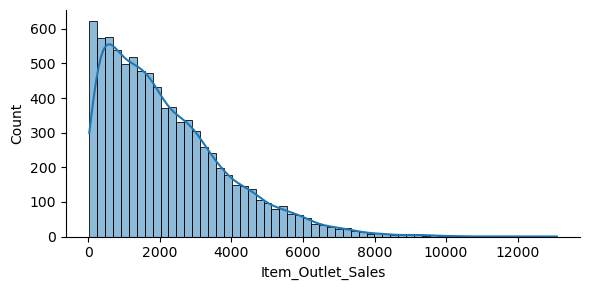

In [570]:
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(1,1))
sns.displot(x=training_data['Item_Outlet_Sales'],kde=True,height=3, aspect=2)


#### We can notice that the graph is positive skewed which is normal because of the above explaination 

### 3.2.1.1 Checking if other features contain outliers 

Item_Weight                     AxesSubplot(0.125,0.11;0.133621x0.77)
Item_Visibility              AxesSubplot(0.285345,0.11;0.133621x0.77)
Item_MRP                      AxesSubplot(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            AxesSubplot(0.766379,0.11;0.133621x0.77)
dtype: object

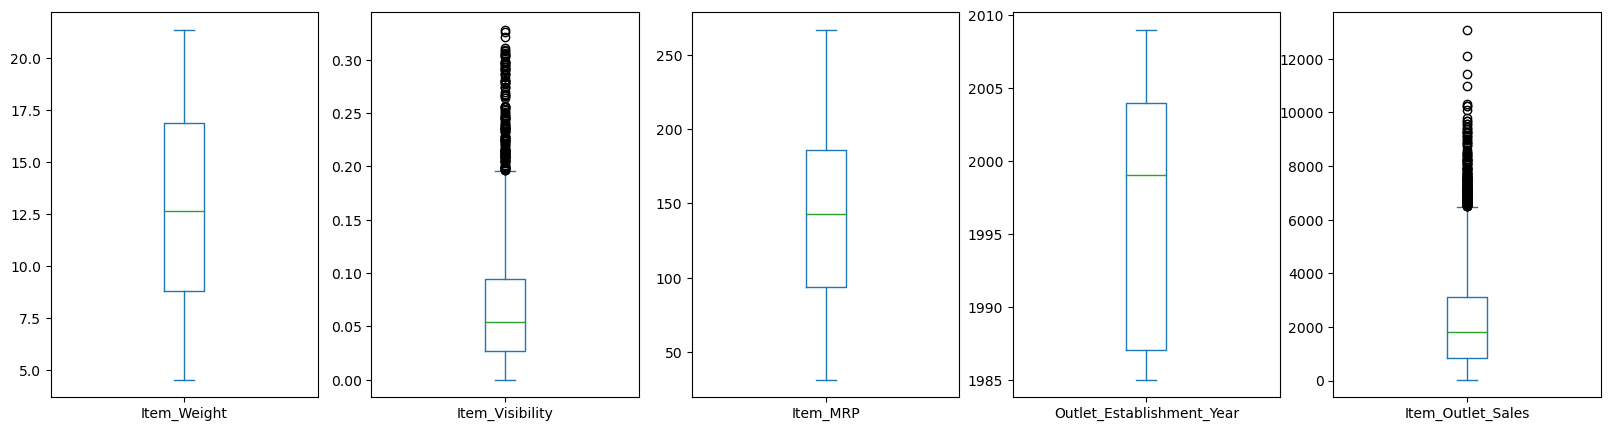

In [571]:
training_data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

####                           So we now we made sure that the outliers exist only in Item_Visibility and Item_Outlet_sales columns

### 3.2.1.2 Dealing with outliers 

#### Replace Item_Visibility 0% value with the median 

In [572]:
# Replace 0s with the median
median=training_data['Item_Visibility'].median()
training_data.loc[:,'Item_Visibility'].replace(to_replace=0,value=median,inplace=True)
testing_data.loc[:,'Item_Visibility'].replace(to_replace=0,value=median,inplace=True)

# print total number of 0s after the replace
print('Total of 0s after replace: ', sum(training_data['Item_Visibility'] == 0))

Total of 0s after replace:  0


#### Trying Log , Square root and Cubic root transformation for the Item_Outlet_Sales column

<Figure size 100x100 with 0 Axes>

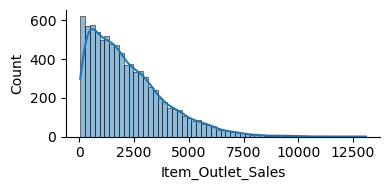

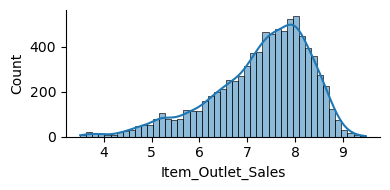

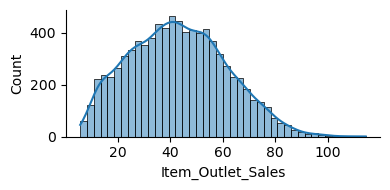

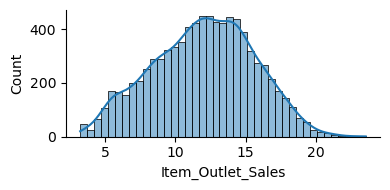

In [573]:
#making a copy to not affect the data 
#making a copy to not affect the data 
df  = training_data['Item_Outlet_Sales'].copy()
df1 = df.apply(np.log)
df2 = df.apply(np.sqrt)
df3 = df.apply(np.cbrt)
plt.figure(figsize=(1,1))
sns.displot(x=df, kde=True, height=2, aspect=2)
sns.displot(x=df1, kde=True, height=2, aspect=2)
sns.displot(x=df2, kde=True, height=2, aspect=2)
sns.displot(x=df3, kde=True, height=2, aspect=2)

### Trying to replace the outliers with the whiskers of the Item_Outlet_Sales column

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


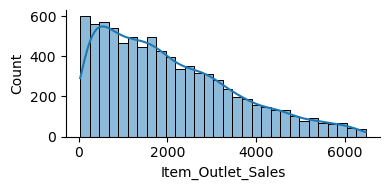

In [574]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(training_data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = training_data[(training_data['Item_Outlet_Sales'] > lower) & (training_data['Item_Outlet_Sales'] < upper)]
sns.displot(x=data["Item_Outlet_Sales"], kde=True, height=2, aspect=2)


#### *After comparing different methods to deal with our outliers , we can notice that the best one so far is the cubic square so we will be using this method*

Item_Outlet_Sales    AxesSubplot(0.125,0.11;0.133621x0.77)
dtype: object

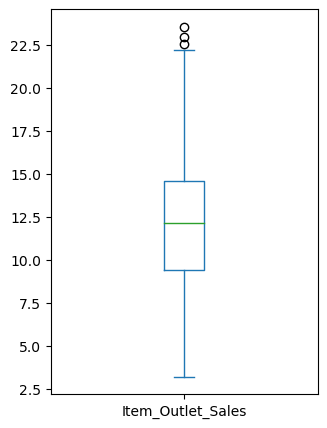

In [575]:
training_data['Item_Outlet_Sales'] = training_data['Item_Outlet_Sales'].apply(np.cbrt)
training_data['Item_Outlet_Sales'].describe()
training_data['Item_Outlet_Sales'].plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

##### *We can see that outliers look way more better then before !*

### 3.2.2 Bivariate Analysis

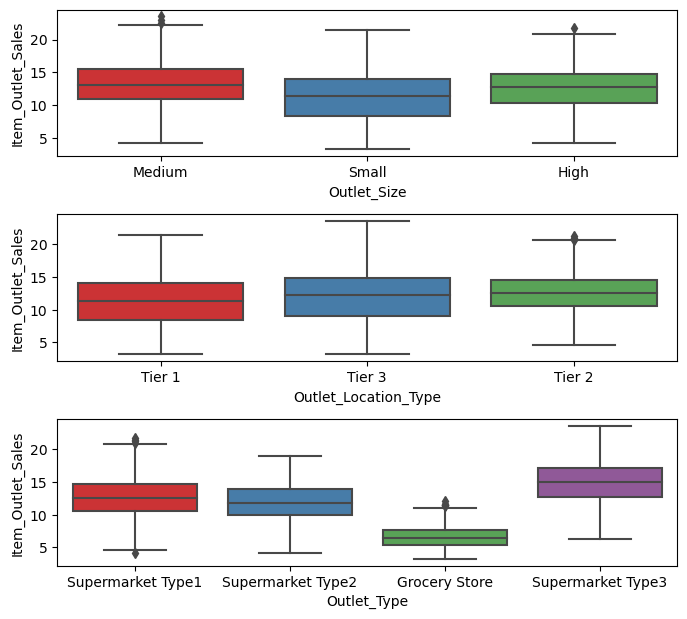

In [576]:
# looking on Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sales  
# to visualize the relationship between a categorical variable and a continuous variable

plt.figure(figsize = (8,4))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=training_data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=training_data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=training_data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

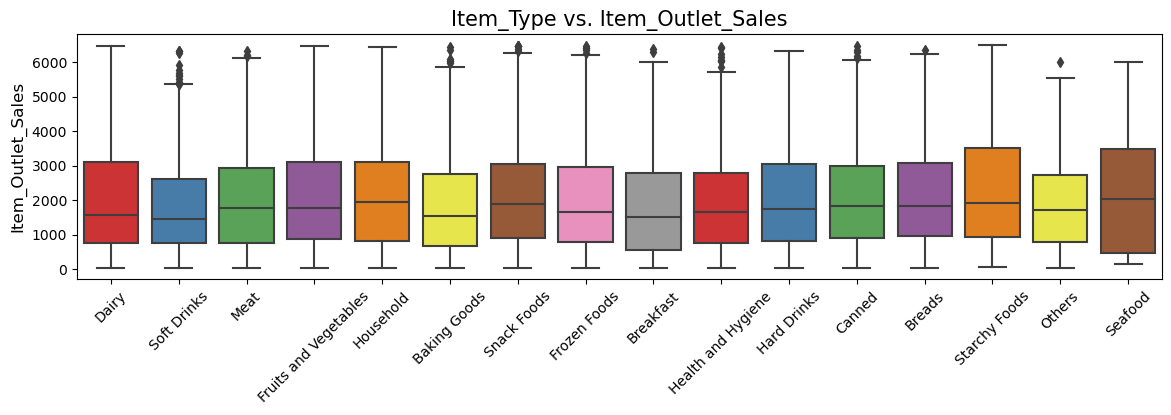

In [577]:
plt.figure(figsize = (14,9))


plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

##### Since all 

## 4-Feature Engineering

### Creating New Features

*From the Previous Section we can notice that we can create 2 new columns called Item_Category and Outlet_Years.<br>
 1.For Item_Category we can drop the Outlet_Establishment_Year column to avoid data redundacy.<br>
 2.For Item_Identifier we can only save numerical Ids instead of categories through label encoding*

In [578]:
#Add Outlet_Age column and see how it's related to the target column to check our hypothesis 
training_data["Outlet_Age"]=  2023 - training_data['Outlet_Establishment_Year']

training_data['Item_Category'] = training_data['Item_Identifier'].apply(lambda x: x[0:2])
training_data['Item_Category'] = training_data['Item_Category'].map({'FD': 'food', 'DR': 'drinks', 'NC': 'non-consumables'})

testing_data['Item_Category'] = testing_data['Item_Identifier'].apply(lambda x: x[0:2])
testing_data['Item_Category'] = testing_data['Item_Category'].map({'FD': 'food', 'DR': 'drinks', 'NC': 'non-consumables'})



training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,15.515611,24,food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.625576,14,drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,12.800240,24,food
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,9.013888,25,food
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,9.982319,36,non-consumables


In [579]:
testing_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,food
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,food
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,non-consumables
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,food
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,food


In [580]:
# correlation with the target column
numeric_columns = training_data.select_dtypes(include=np.number)
# calculate correlation matrix
corr_matrix = numeric_columns.corr()
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.015925,0.025732,-0.014015,0.009833,0.014015
Item_Visibility,-0.015925,1.000000,-0.004531,-0.078271,-0.180940,0.078271
Item_MRP,0.025732,-0.004531,1.000000,0.005020,0.551610,-0.005020
Outlet_Establishment_Year,-0.014015,-0.078271,0.005020,1.000000,0.030146,-1.000000
Item_Outlet_Sales,0.009833,-0.180940,0.551610,0.030146,1.000000,-0.030146
Outlet_Age,0.014015,0.078271,-0.005020,-1.000000,-0.030146,1.000000


##### *We can observe the following :*  
  * Item_Outlet_Sales is highly correlated with Item_MRP 
  * Outlet_Age and Item_Visibility are negativaly correlated so we need to drop them since they are not helpful
  * We can see that none of the input features is having high correlation factor (> 0.6) with the target , it's only extremely low positive correlation except Item_MRP , which may make the model struggle to make accurate predictions, even if it is a well-designed and well-trained model.
  
  ###### *Beside the Correlation Matrix , we can drop the Item_Identifier and Outlet_Identifier Columns since they are not sufficient to accurately predict the sales of an item at a particular store , they are just labels (identifiers). The sales could be affected by other factor like the location of the store, the MRP ... but not identifiers !*



###  Variables Identification

In [581]:
print(training_data['Item_Identifier'].unique())
print(training_data['Item_Fat_Content'].unique())
print(training_data['Item_Type'].unique())
print(training_data['Outlet_Establishment_Year'].sort_values().unique())
print(training_data['Outlet_Size'].unique())
print(training_data['Outlet_Location_Type'].unique())
print(training_data['Outlet_Type'].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Medium' 'Small' 'High']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### We can notice the following :
* Item_Identifier Column starts with 3 categories : FD=Food ,  DR=Drink , NC=Non-Consumable . Regarding the NC , it should not have Fat_Content ( maybe it can have another category)
* Item_Fat_Content Column has 3 categories : Low Fat and Regular . So we can notice that low fat category has 2 aliases : LF , low fat and Low Fat . Same for Regualar , it has 2 aliases : Regular and reg

In [582]:
# replace the repetitive values in Item_Fat_Content
training_data["Item_Fat_Content"].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
testing_data["Item_Fat_Content"].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)

In [583]:
# adding a new category in Item_Fat_Content column for non-consumable items
training_data.loc[training_data['Item_Identifier'].str.startswith('NC'), 'Item_Fat_Content'] = 'None'
testing_data.loc[testing_data['Item_Identifier'].str.startswith('NC'), 'Item_Fat_Content'] = 'None'

In [584]:
training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,15.515611,24,food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.625576,14,drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,12.800240,24,food
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,9.013888,25,food
4,NCD19,8.93,None,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,9.982319,36,non-consumables



* ###### *We will drop Outlet_Age , Item_Visibility , Item_Identifier and Outlet_Identifier as mentioned above*

In [585]:
#Drop irrlevent Columns
training_data = training_data.drop(['Outlet_Age', 'Item_Visibility','Item_Identifier' , 'Outlet_Identifier' ], axis=1)
testing_data = testing_data.drop([ 'Item_Visibility','Item_Identifier' , 'Outlet_Identifier' ], axis=1)

In [586]:
training_data.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,15.515611,food
1,5.92,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,7.625576,drinks
2,17.50,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,12.800240,food
3,19.20,Regular,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,9.013888,food
4,8.93,None,Household,53.8614,1987,High,Tier 3,Supermarket Type1,9.982319,non-consumables


In [587]:
testing_data.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,20.750,Low Fat,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,food
1,8.300,Regular,Dairy,87.3198,2007,Small,Tier 2,Supermarket Type1,food
2,14.600,None,Others,241.7538,1998,Small,Tier 3,Grocery Store,non-consumables
3,7.315,Low Fat,Snack Foods,155.0340,2007,Small,Tier 2,Supermarket Type1,food
4,13.600,Regular,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,food


### Encoding Categorical Data 

#### Label Encoding for Ordinal Data

In [588]:
# Create separate LabelEncoder objects for training and testing data
le_train = LabelEncoder()
le_test = LabelEncoder()

# Specify the columns to be encoded
label = ['Outlet_Size', 'Item_Fat_Content', 'Outlet_Location_Type']

# Apply LabelEncoder to training_data
training_data[label] = training_data[label].apply(lambda col: le_train.fit_transform(col.astype(str)))

# Apply LabelEncoder to testing_data
testing_data[label] = testing_data[label].apply(lambda col: le_test.fit_transform(col.astype(str)))


training_data.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,0,Dairy,249.8092,1999,1,0,Supermarket Type1,15.515611,food
1,5.92,2,Soft Drinks,48.2692,2009,1,2,Supermarket Type2,7.625576,drinks
2,17.50,0,Meat,141.6180,1999,1,0,Supermarket Type1,12.800240,food
3,19.20,2,Fruits and Vegetables,182.0950,1998,2,2,Grocery Store,9.013888,food
4,8.93,1,Household,53.8614,1987,0,2,Supermarket Type1,9.982319,non-consumables


In [589]:
testing_data.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,20.750,0,Snack Foods,107.8622,1999,1,0,Supermarket Type1,food
1,8.300,2,Dairy,87.3198,2007,2,1,Supermarket Type1,food
2,14.600,1,Others,241.7538,1998,2,2,Grocery Store,non-consumables
3,7.315,0,Snack Foods,155.0340,2007,2,1,Supermarket Type1,food
4,13.600,2,Dairy,234.2300,1985,1,2,Supermarket Type3,food


#### One Hot Encoding for Nominal Data

In [590]:
# Specify the categorical features to be encoded
cat_features = ['Item_Type', 'Outlet_Type', 'Item_Category']

# Create a OneHotEncoder object
ohe = OneHotEncoder(sparse=False)

# Fit the OneHotEncoder on the training data
ohe.fit(training_data[cat_features])

# Transform the categorical features in training_data and testing_data using OneHotEncoder
training_data_ohe = ohe.transform(training_data[cat_features])
testing_data_ohe = ohe.transform(testing_data[cat_features])

# Convert the transformed features into DataFrames
training_data_ohe_df = pd.DataFrame(training_data_ohe, columns=ohe.get_feature_names_out(cat_features))
testing_data_ohe_df = pd.DataFrame(testing_data_ohe, columns=ohe.get_feature_names_out(cat_features))

# Concatenate the transformed features with the original data
training_data = pd.concat([training_data, training_data_ohe_df], axis=1)
testing_data = pd.concat([testing_data, testing_data_ohe_df], axis=1)

# Drop the original categorical features
training_data.drop(cat_features, axis=1, inplace=True)
testing_data.drop(cat_features, axis=1, inplace=True)

testing_data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_drinks,Item_Category_food,Item_Category_non-consumables
0,20.750,0,107.8622,1999,1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,8.300,2,87.3198,2007,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,14.600,1,241.7538,1998,2,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.315,0,155.0340,2007,2,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,13.600,2,234.2300,1985,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### 5-Model

### Linear Regression

In [591]:
# # Get the common columns between training_data and testing_data
# common_cols = list(set(training_data.columns) & set(testing_data.columns))

# # Initialize an empty array to store the target values
# target_values = []

# # Check if training_data and testing_data have any common data
# common_data = pd.merge(training_data[common_cols], testing_data[common_cols], how='inner')

# # If common_data is not empty, get the corresponding target values and append them to target_values
# if not common_data.empty:
#     for index, row in common_data.iterrows():
#         target_values.append(training_data.loc[(training_data[common_cols] == row[common_cols]).all(axis=1), 'Item_Outlet_Sales'].iloc[0])

In [592]:
# target_values= pd.DataFrame(target_values)
# target_values.head()

In [593]:

scale = StandardScaler()
x = scale.fit_transform(training_data.drop("Item_Outlet_Sales", axis=1))
y = scale.fit_transform(training_data["Item_Outlet_Sales"].values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred2 = model.predict(testing_data)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

print("R2 score:", metrics.r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score: 0.6902323529629996
RMSE: 2.0389997532164346


C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Lasso Regression

In [594]:
scale = StandardScaler()
x = scale.fit_transform(training_data.drop("Item_Outlet_Sales", axis=1))
y = scale.fit_transform(training_data["Item_Outlet_Sales"].values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)
model = Lasso(max_iter=10e2)
model.fit(x_train, y_train)

y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE is coming greater than 1, which is more than the expected range of 0 to 1 when the data is standard scaled.

R2 score -0.00014849403096994784
RMSE: 3.663796871142746


### Random Forest

In [595]:
scale = StandardScaler()
x = scale.fit_transform(training_data.drop("Item_Outlet_Sales", axis=1))
y = scale.fit_transform(training_data["Item_Outlet_Sales"].values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)
model = RandomForestRegressor()
model.fit(x_train, y_train.ravel())

y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.6700369307020808
RMSE: 2.1044170515956697


### XGBoost

In [596]:
scale = StandardScaler()
x = scale.fit_transform(training_data.drop("Item_Outlet_Sales", axis=1))
y = scale.fit_transform(training_data["Item_Outlet_Sales"].values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.6813650359137655
RMSE: 2.067977739569049
